In [33]:
import numpy as np
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from pathlib import Path

FIGPATH = Path("../figs")

def linf(x, a, b):
    return a*x + b

In [2]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

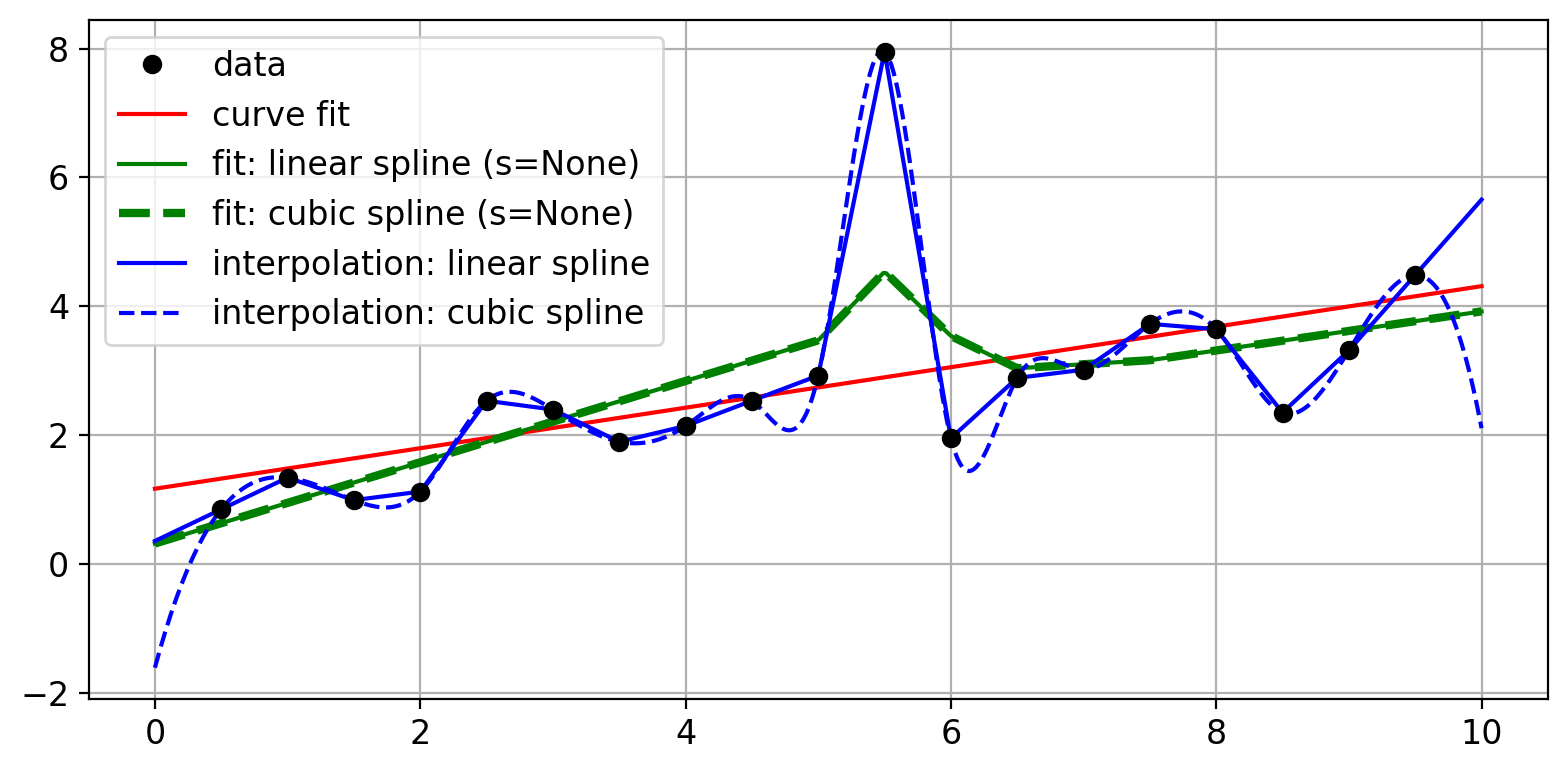

In [37]:
np.random.seed(12345)
x = np.arange(0.5, 10, 0.5)
y = 0.3*x + 0.8 + np.random.normal(loc=0, scale=0.5, size=x.shape)
y[10] += 5
xx = np.linspace(0, 10, 500)

popt, pcov = curve_fit(linf, xdata=x, ydata=y)

# linear spline interpolation
interp_1 = UnivariateSpline(x, y, s=0, k=1)

# cubic spline interpolation
interp_3 = UnivariateSpline(x, y, s=0, k=3)

# linear spline "FITTING" 
# you need to tune s until fit looks good. Default is None.
spline_1 = UnivariateSpline(x, y, s=None, k=1)

# cubic spline "FITTING" 
# you need to tune s until fit looks good. Default is None.
spline_3 = UnivariateSpline(x, y, s=None, k=1)


fig, axs = plt.subplots(1, 1, figsize=(8, 4))
axs.plot(x, y, 'ko', label="data", zorder=999)
axs.plot(xx, linf(xx, *popt), 'r-', label='curve fit')
axs.plot(xx, spline_1(xx), 'g-', label='fit: linear spline (s=None)')
axs.plot(xx, spline_3(xx), 'g--', lw=3, label='fit: cubic spline (s=None)')
axs.plot(xx, interp_1(xx), 'b-', label='interpolation: linear spline')
axs.plot(xx, interp_3(xx), 'b--', label='interpolation: cubic spline')
axs.grid()

axs.legend()
plt.tight_layout()
plt.savefig(FIGPATH/"interpolation.png", dpi=300)